Text(0.5, 1.0, 'End-end distance and radius of gyration vs Time')

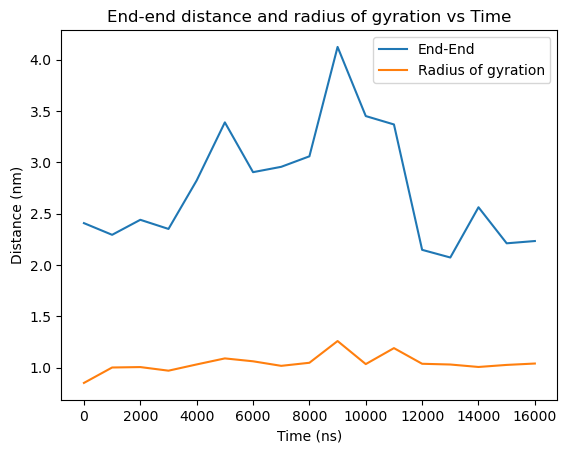

In [9]:
import numpy as np
import matplotlib.pyplot as plt
#load mdtraj
import mdtraj as md
import os
traj = md.load_xtc('../Data/1hz3_T310.stepid25000000.every100ps.nowater.xtc', top='../Data/1hz3_T310.start.nowater.gro')
def end_end(traj):
    # get the first and last atom
    first = traj.xyz[:,0,:]
    last = traj.xyz[:,-1,:]
    # compute the distance between the first and last atom
    dist = np.sqrt(np.sum((first-last)**2, axis=1))
    return dist

#Compute the distance between the first and last atom
dist = end_end(traj)

# Find the radius of gyration over time
def radius_of_gyration(traj):
    #Compute the center of mass of the protein
    com = md.compute_center_of_mass(traj)
    #Compute the distance between the center of mass and each atom
    xyz = traj.xyz - com[:,np.newaxis,:]
    # Find the square of the previous
    xyz2 = xyz**2
    #The radius of gyration
    rg = np.sqrt(np.sum(xyz2, axis=2).mean(axis=1))
    return rg
rg = radius_of_gyration(traj)
#Plot the dist vs time
plt.plot(traj.time,dist)
#Plot the radius of gyration vs time on the same plot
plt.plot(traj.time,radius_of_gyration(traj))
#Create x
plt.xlabel('Time (ns)')
#Create y
plt.ylabel('Distance (nm)')
#Create a legend
plt.legend(['End-End','Radius of gyration'])
#Create a title
plt.title('End-end distance and radius of gyration vs Time')


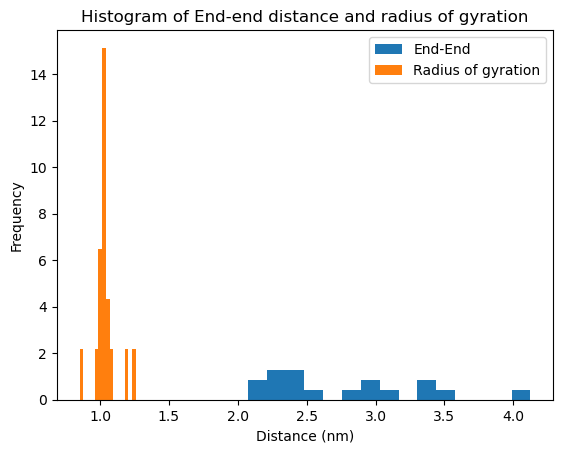

In [11]:
#Normanized histogram
plt.hist(dist, bins=15, density=True, label='End-End')
plt.hist(radius_of_gyration(traj), bins=15, density=True, label='Radius of gyration')
#create x-axis label
plt.xlabel('Distance (nm)')
#create y-axis label
plt.ylabel('Frequency')
plt.title('Histogram of End-end distance and radius of gyration')
plt.legend()